In [1]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
import os
import math
import skfmm
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D
import heapq

In [208]:
FAR = np.inf
ACCEPTED = -1
CONSIDERED = 1
directions = [(1, 0, 0), (-1, 0, 0), (0, 1, 0), (0, -1, 0),(1, 1, 0),(1, -1, 0),(-1, 1, 0),(-1, -1, 0)]

def solve_eikonal(size):
    u = np.full((size, size, size), FAR)
    status = np.full((size, size, size), FAR)
    heap = []

    for x in range(size):
        for y in range(size):
            for z in range(size):
                if (x == 0 and z == 0) or (x == size - 1 and z == size/2) or (y == 0 and z == size/4) or (y == size - 1 and z == 3*size/4) or (x == 0 and y == 0) or (x == size - 1 and y == 0) or (y == size-1 and x == 0) or (y == size - 1 and x == size-1):
                    u[x, y, z] = 0
                    status[x, y, z] = ACCEPTED
                    for dx, dy, dz in directions:
                        nx, ny = x + dx, y + dy
                        if 0 <= nx < size and 0 <= ny < size and status[nx, ny, z] != ACCEPTED:
                            status[nx, ny, :] = CONSIDERED
                            distance=np.inf
                            new_z=z
                            if (size/8< new_z <=3*size/8) or (5*size/8< new_z <=7*size/8):

                                new_x=nx-np.cos(2*np.pi*new_z/size)/np.abs(np.sin(2*np.pi*new_z/size))
                                new_y=ny-np.sign(np.sin(2*np.pi*new_z/size))

                                if (np.abs(new_x-round(new_x))<1e-15):
                                    new_x=round(new_x)

                                if (0 <= new_x <= size-1 and 0 <= new_y <= size-1):

                                    if(status[math.floor(new_x), int(new_y), z] == ACCEPTED) and (status[math.ceil(new_x), int(new_y), z] == ACCEPTED):
                                        if (new_x!=round(new_x)):
                                            new_distance=(new_x-math.floor(new_x))*u[math.floor(new_x), int(new_y), z]+(math.ceil(new_x)-new_x)*u[math.ceil(new_x), int(new_y), z]+np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                                        if (new_x==round(new_x)):
                                            new_distance=u[new_x, int(new_y), z]+np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                                        distance=new_distance
                            else:
                                new_x=nx-np.sign(np.cos(2*np.pi*new_z/size))
                                new_y=ny-np.sin(2*np.pi*new_z/size)/np.abs(np.cos(2*np.pi*new_z/size))  

                                if (np.abs(new_y-round(new_y))<1e-15):
                                    new_y=round(new_y)
                                if (0 <= new_x <= size-1 and 0 <= new_y <= size-1):

                                    if(status[int(new_x), math.floor(new_y), z] == ACCEPTED) and (status[int(new_x), math.ceil(new_y), z] == ACCEPTED):
                                        if (new_y!=round(new_y)):
                                            new_distance=(new_y-math.floor(new_y))*u[int(new_x), math.floor(new_y), z]+(math.ceil(new_y)-new_y)*u[int(new_x), math.floor(new_y), z]+np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                                        if (new_y==round(new_y)):
                                            new_distance=u[int(new_x), new_y, z]+np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                                        distance=new_distance
                                            
                            u[nx, ny, z]=distance
                            heapq.heappush(heap, (distance, (nx, ny, z)))
                          
    while heap:
        (dist, (x, y, z)) = heapq.heappop(heap)
        
        if status[x, y, z] != CONSIDERED:
            continue

        u[x, y, z]=dist
        status[x, y, z] = ACCEPTED
        
        for dx, dy, dz in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < size and 0 <= ny < size and status[nx, ny, z] != ACCEPTED:
                status[nx, ny, z] = CONSIDERED
                distance=np.inf
                new_z=z
                if (size/8< new_z <=3*size/8) or (5*size/8< new_z <=7*size/8):

                    new_x=nx-np.cos(2*np.pi*new_z/size)/np.abs(np.sin(2*np.pi*new_z/size))
                    new_y=ny-np.sign(np.sin(2*np.pi*new_z/size))

                    if (np.abs(new_x-round(new_x))<1e-15):
                        new_x=round(new_x)

                    if (0 <= new_x <= size-1 and 0 <= new_y <= size-1):

                        if(status[math.floor(new_x), int(new_y), z] == ACCEPTED) and (status[math.ceil(new_x), int(new_y), z] == ACCEPTED):
                            if (new_x!=round(new_x)):
                                new_distance=(new_x-math.floor(new_x))*u[math.floor(new_x), int(new_y), z]+(math.ceil(new_x)-new_x)*u[math.ceil(new_x), int(new_y), z]+np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                            if (new_x==round(new_x)):
                                new_distance=u[new_x, int(new_y), z]+np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                            distance=new_distance
                else:
                    new_x=nx-np.sign(np.cos(2*np.pi*new_z/size))
                    new_y=ny-np.sin(2*np.pi*new_z/size)/np.abs(np.cos(2*np.pi*new_z/size))  

                    if (np.abs(new_y-round(new_y))<1e-15):
                        if(new_z==1):
                            print(new_y)
                        new_y=round(new_y)
                    if (0 <= new_x <= size-1 and 0 <= new_y <= size-1):

                        if(status[int(new_x), math.floor(new_y), z] == ACCEPTED) and (status[int(new_x), math.ceil(new_y), z] == ACCEPTED):
                            if(new_y!=round(new_y)):
                                new_distance=(new_y-math.floor(new_y))*u[int(new_x), math.floor(new_y), z]+(math.ceil(new_y)-new_y)*u[int(new_x), math.floor(new_y), z]+np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                            if(new_y==round(new_y)):
                                new_distance=u[int(new_x), new_y, z]+np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                            distance=new_distance

                                  
                u[nx,ny,z]=distance
                heapq.heappush(heap, (distance, (nx, ny, z)))
                    
    return u,status

size = 64
u,status = solve_eikonal(size)
x1, y1, z1 = np.where((u >10.9) & (u < 11.33))
x2, y2, z2 = np.where((u >57.9) & (u < 58.1))

In [211]:
# Extract Multiple Arrival
x, y = 18, 18
critical_points = []
for i in range(len(u[x, y, :])):
    if i==(len(u[x, y, :])-1):
        if (u[x, y, 0] < u[x, y, i] and u[x, y, -2]<u[x, y, i]) or (u[x, y, 0]>u[x, y, i] and u[x, y, -2]>u[x, y, i]):
            critical_points.append((x, y, i))
    else:
        if (u[x, y, i+1]<u[x, y, i] and u[x, y, i-1]<u[x, y, i]) or (u[x, y, i+1]>u[x, y, i] and u[x, y, i-1]>u[x, y, i]):
            critical_points.append((x, y, i))
            
for x,y,z in critical_points:
    
    print(x,y,z, u[x,y,z])

18 18 0 18.0
18 18 16 18.0
18 18 32 45.0
18 18 40 63.63961030678923
18 18 48 45.0


1.9692332344763441

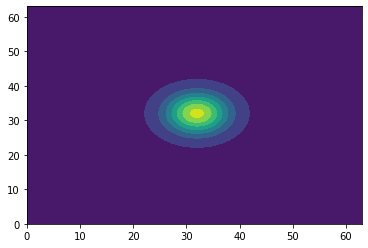

In [213]:
def gaussian_slowness_field(size, peak_slowness):
    center = [size / 2, size / 2]
    sigma = size / 16  
    x, y = np.indices((size, size))
    d = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    slowness_field = 1+np.exp(-d**2 / (2 * sigma**2))
    return slowness_field

peak_slowness=1
size = 64
slowness_field = gaussian_slowness_field(size, peak_slowness)
plt.contourf(slowness_field)
slowness_field[32,33]

In [376]:
FAR = np.inf
ACCEPTED = -1
CONSIDERED = 1

def solve_eikonal(size, slowness_field):
    u = np.full((size, size, size), FAR)
    status = np.full((size, size, size), FAR)
    heap = []

    for x in range(size):
        for y in range(size):
            for z in range(size):
                if (x == round(size/2) and y == 0):
                    u[x, y, z] = 0
                    status[x, y, z] = ACCEPTED
                    for dx, dy, dz in directions:
                        nx, ny = x + dx, y + dy
                        if 0 <= nx < size and 0 <= ny < size and status[nx, ny, z] != ACCEPTED:
                            status[nx, ny, :] = CONSIDERED
                            distance=np.inf
                            new_z=z
                            if (size/8< new_z <=3*size/8) or (5*size/8< new_z <=7*size/8):

                                new_x=nx-np.cos(2*np.pi*new_z/size)/np.abs(np.sin(2*np.pi*new_z/size))
                                new_y=ny-np.sign(np.sin(2*np.pi*new_z/size))

                                if (np.abs(new_x-round(new_x))<1e-15):
                                    new_x=round(new_x)

                                if (0 <= new_x <= size-1 and 0 <= new_y <= size-1):

                                    if(status[math.floor(new_x), int(new_y), z] == ACCEPTED) and (status[math.ceil(new_x), int(new_y), z] == ACCEPTED):
                                        if (new_x!=round(new_x)):
                                            new_distance=(new_x-math.floor(new_x))*u[math.floor(new_x), int(new_y), z]+(math.ceil(new_x)-new_x)*u[math.ceil(new_x), int(new_y), z]+slowness_field[math.ceil(new_x), int(new_y)]*np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                                        if (new_x==round(new_x)):
                                            new_distance=u[new_x, int(new_y), z]+np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                                        distance=new_distance
                            else:
                                new_x=nx-np.sign(np.cos(2*np.pi*new_z/size))
                                new_y=ny-np.sin(2*np.pi*new_z/size)/np.abs(np.cos(2*np.pi*new_z/size))  

                                if (np.abs(new_y-round(new_y))<1e-15):
                                    new_y=round(new_y)
                                if (0 <= new_x <= size-1 and 0 <= new_y <= size-1):

                                    if(status[int(new_x), math.floor(new_y), z] == ACCEPTED) and (status[int(new_x), math.ceil(new_y), z] == ACCEPTED):
                                        if (new_y!=round(new_y)):
                                            new_distance=(new_y-math.floor(new_y))*u[int(new_x), math.floor(new_y), z]+(math.ceil(new_y)-new_y)*u[int(new_x), math.floor(new_y), z]+slowness_field[math.ceil(new_x), int(new_y)]*np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                                        if (new_y==round(new_y)):
                                            new_distance=u[int(new_x), new_y, z]+np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                                        distance=new_distance
                                            
                            u[nx, ny, z]=distance
                            heapq.heappush(heap, (distance, (nx, ny, z)))
                          
    while heap:
        (dist, (x, y, z)) = heapq.heappop(heap)
        
        if status[x, y, z] != CONSIDERED:
            continue

        u[x, y, z]=dist
        status[x, y, z] = ACCEPTED
        
        for dx, dy, dz in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < size and 0 <= ny < size and status[nx, ny, z] != ACCEPTED:
                status[nx, ny, z] = CONSIDERED
                distance=np.inf
                new_z=z
                if (size/8< new_z <=3*size/8) or (5*size/8< new_z <=7*size/8):

                    new_x=nx-np.cos(2*np.pi*new_z/size)/np.abs(np.sin(2*np.pi*new_z/size))
                    new_y=ny-np.sign(np.sin(2*np.pi*new_z/size))

                    if (np.abs(new_x-round(new_x))<1e-15):
                        new_x=round(new_x)

                    if (0 <= new_x <= size-1 and 0 <= new_y <= size-1):

                        if(status[math.floor(new_x), int(new_y), z] == ACCEPTED) and (status[math.ceil(new_x), int(new_y), z] == ACCEPTED):
                            if (new_x!=round(new_x)):
                                new_distance=(new_x-math.floor(new_x))*u[math.floor(new_x), int(new_y), z]+(math.ceil(new_x)-new_x)*u[math.ceil(new_x), int(new_y), z]+slowness_field[math.ceil(new_x), int(new_y)]*np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                            if (new_x==round(new_x)):
                                new_distance=u[new_x, int(new_y), z]+np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                            distance=new_distance
                else:
                    new_x=nx-np.sign(np.cos(2*np.pi*new_z/size))
                    new_y=ny-np.sin(2*np.pi*new_z/size)/np.abs(np.cos(2*np.pi*new_z/size))  

                    if (np.abs(new_y-round(new_y))<1e-15):
                        if(new_z==1):
                            print(new_y)
                        new_y=round(new_y)
                    if (0 <= new_x <= size-1 and 0 <= new_y <= size-1):

                        if(status[int(new_x), math.floor(new_y), z] == ACCEPTED) and (status[int(new_x), math.ceil(new_y), z] == ACCEPTED):
                            if(new_y!=round(new_y)):
                                new_distance=(new_y-math.floor(new_y))*u[int(new_x), math.floor(new_y), z]+(math.ceil(new_y)-new_y)*u[int(new_x), math.floor(new_y), z]+slowness_field[math.ceil(new_x), int(new_y)]*np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                            if(new_y==round(new_y)):
                                new_distance=u[int(new_x), new_y, z]+np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                            distance=new_distance

                                  
                u[nx,ny,z]=distance
                heapq.heappush(heap, (distance, (nx, ny, z)))
                    
    return u,status

size = 64
u,status = solve_eikonal(size, slowness_field)
x1, y1, z1 = np.where((u >10.9) & (u < 11.33))
x2, y2, z2 = np.where((u >57.9) & (u < 58.1))

In [378]:
# Extract Multiple Arrival
x, y = 24, 55
critical_points = []
for i in range(len(u[x, y, :])):
    if i==(len(u[x, y, :])-1):
        if (u[x, y, 0]<u[x, y, i] and u[x, y, -2]<u[x, y, i]) or (u[x, y, 0]>u[x, y, i] and u[x, y, -2]>u[x, y, i]):
            critical_points.append((x, y, i))
    else:
        if (u[x, y, i+1]<u[x, y, i] and u[x, y, i-1]<u[x, y, i]) or (u[x, y, i+1]>u[x, y, i] and u[x, y, i-1]>u[x, y, i]):
            critical_points.append((x, y, i))
            
for x,y,z in critical_points:
    print(x,y, u[x,y,z])

24 55 11.313708498984763


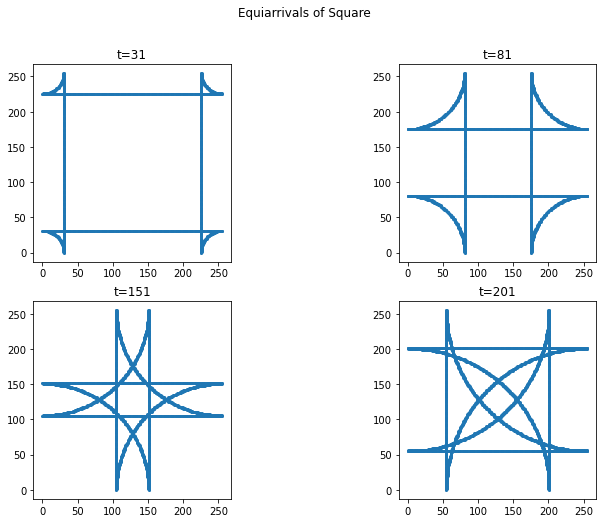

In [330]:
size = 256
u,status = solve_eikonal(size)

x1, y1, z1 = np.where((u > 30) & (u < 32))
x2, y2, z2 = np.where((u > 80) & (u < 82))
x3, y3, z3 = np.where((u > 150) & (u < 152))
x4, y4, z4 = np.where((u > 200) & (u < 202))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0,0].scatter(x1, y1, s=3)
axes[0,0].set_title('t=31')
axes[0,0].axis('square')

axes[0,1].scatter(x2, y2, s=3)
axes[0,1].set_title('t=81')
axes[0,1].axis('square')

axes[1,0].scatter(x3, y3, s=3)
axes[1,0].set_title('t=151')
axes[1,0].axis('square')

axes[1,1].scatter(x4, y4, s=3)
axes[1,1].set_title('t=201')
axes[1,1].axis('square')

plt.suptitle('Equiarrivals of Square')
plt.show()

In [338]:
# Extract Multiple Arrival
x, y = 22, 39,
critical_points = []
for i in range(len(u[x, y, :])):
    if i==(len(u[x, y, :])-1):
        if (u[x, y, 0]<u[x, y, i] and u[x, y, -2]<u[x, y, i]) or (u[x, y, 0]>u[x, y, i] and u[x, y, -2]>u[x, y, i]):
            critical_points.append((x, y, i))
    else:
        if (u[x, y, i+1]<u[x, y, i] and u[x, y, i-1]<u[x, y, i]) or (u[x, y, i+1]>u[x, y, i] and u[x, y, i-1]>u[x, y, i]):
            critical_points.append((x, y, i))
            
for x,y,z in critical_points:
    print(x,y, u[x,y,z])

22 39 217.0
22 39 218.112
22 39 22.0
22 39 44.777
22 39 39.0
22 39 237.228
22 39 234.0
22 39 319.132


In [538]:
FAR = np.inf
ACCEPTED = -1
CONSIDERED = 1

def solve_eikonal(size, slowness_field):
    u = np.full((size, size, size), FAR)
    status = np.full((size, size, size), FAR)
    heap = []

    for x in range(size):
        for y in range(size):
            for z in range(size):
                if (x == round(size/2) and y == 0):
                    u[x, y, z] = 0
                    status[x, y, z] = ACCEPTED
                    for dx, dy, dz in directions:
                        nx, ny = x + dx, y + dy
                        if 0 <= nx < size and 0 <= ny < size and status[nx, ny, z] != ACCEPTED:
                            status[nx, ny, :] = CONSIDERED
                            distance=np.inf
                            new_z=z
                            if (size/8< new_z <=3*size/8) or (5*size/8< new_z <=7*size/8):

                                new_x=nx-np.cos(2*np.pi*new_z/size)/np.abs(np.sin(2*np.pi*new_z/size))
                                new_y=ny-np.sign(np.sin(2*np.pi*new_z/size))

                                if (np.abs(new_x-round(new_x))<1e-15):
                                    new_x=round(new_x)

                                if (0 <= new_x <= size-1 and 0 <= new_y <= size-1):

                                    if(status[math.floor(new_x), int(new_y), z] == ACCEPTED) and (status[math.ceil(new_x), int(new_y), z] == ACCEPTED):
                                        if (new_x!=round(new_x)):
                                            new_distance=(new_x-math.floor(new_x))*u[math.floor(new_x), int(new_y), z]+(math.ceil(new_x)-new_x)*u[math.ceil(new_x), int(new_y), z]+slowness_field[math.ceil(new_x), int(new_y)]*np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                                        if (new_x==round(new_x)):
                                            new_distance=u[new_x, int(new_y), z]+np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                                        distance=new_distance
                            else:
                                new_x=nx-np.sign(np.cos(2*np.pi*new_z/size))
                                new_y=ny-np.sin(2*np.pi*new_z/size)/np.abs(np.cos(2*np.pi*new_z/size))  

                                if (np.abs(new_y-round(new_y))<1e-15):
                                    new_y=round(new_y)
                                if (0 <= new_x <= size-1 and 0 <= new_y <= size-1):

                                    if(status[int(new_x), math.floor(new_y), z] == ACCEPTED) and (status[int(new_x), math.ceil(new_y), z] == ACCEPTED):
                                        if (new_y!=round(new_y)):
                                            new_distance=(new_y-math.floor(new_y))*u[int(new_x), math.floor(new_y), z]+(math.ceil(new_y)-new_y)*u[int(new_x), math.floor(new_y), z]+slowness_field[math.ceil(new_x), int(new_y)]*np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                                        if (new_y==round(new_y)):
                                            new_distance=u[int(new_x), new_y, z]+np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                                        distance=new_distance
                                            
                            u[nx, ny, z]=distance
                            heapq.heappush(heap, (distance, (nx, ny, z)))
                          
    while heap:
        (dist, (x, y, z)) = heapq.heappop(heap)
        
        if status[x, y, z] != CONSIDERED:
            continue

        u[x, y, z]=dist
        status[x, y, z] = ACCEPTED
        
        for dx, dy, dz in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < size and 0 <= ny < size and status[nx, ny, z] != ACCEPTED:
                status[nx, ny, z] = CONSIDERED
                distance=np.inf
                new_z=z
                if (size/8< new_z <=3*size/8) or (5*size/8< new_z <=7*size/8):

                    new_x=nx-np.cos(2*np.pi*new_z/size)/np.abs(np.sin(2*np.pi*new_z/size))
                    new_y=ny-np.sign(np.sin(2*np.pi*new_z/size))

                    if (np.abs(new_x-round(new_x))<1e-15):
                        new_x=round(new_x)

                    if (0 <= new_x <= size-1 and 0 <= new_y <= size-1):

                        if(status[math.floor(new_x), int(new_y), z] == ACCEPTED) and (status[math.ceil(new_x), int(new_y), z] == ACCEPTED):
                            if (new_x!=round(new_x)):
                                new_distance=(new_x-math.floor(new_x))*u[math.floor(new_x), int(new_y), z]+(math.ceil(new_x)-new_x)*u[math.ceil(new_x), int(new_y), z]+slowness_field[math.ceil(new_x), int(new_y)]*np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                            if (new_x==round(new_x)):
                                new_distance=u[new_x, int(new_y), z]+np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                            distance=new_distance
                else:
                    new_x=nx-np.sign(np.cos(2*np.pi*new_z/size))
                    new_y=ny-np.sin(2*np.pi*new_z/size)/np.abs(np.cos(2*np.pi*new_z/size))  

                    if (np.abs(new_y-round(new_y))<1e-15):
                        if(new_z==1):
                            print(new_y)
                        new_y=round(new_y)
                    if (0 <= new_x <= size-1 and 0 <= new_y <= size-1):

                        if(status[int(new_x), math.floor(new_y), z] == ACCEPTED) and (status[int(new_x), math.ceil(new_y), z] == ACCEPTED):
                            if(new_y!=round(new_y)):
                                new_distance=(new_y-math.floor(new_y))*u[int(new_x), math.floor(new_y), z]+(math.ceil(new_y)-new_y)*u[int(new_x), math.floor(new_y), z]+slowness_field[math.ceil(new_x), int(new_y)]*np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                            if(new_y==round(new_y)):
                                new_distance=u[int(new_x), new_y, z]+np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                            distance=new_distance

                                  
                u[nx,ny,z]=distance
                heapq.heappush(heap, (distance, (nx, ny, z)))
                    
    return u,status

size = 64
u,status = solve_eikonal(size, slowness_field)
x1, y1, z1 = np.where((u >10.9) & (u < 11.33))
x2, y2, z2 = np.where((u >57.9) & (u < 58.1))

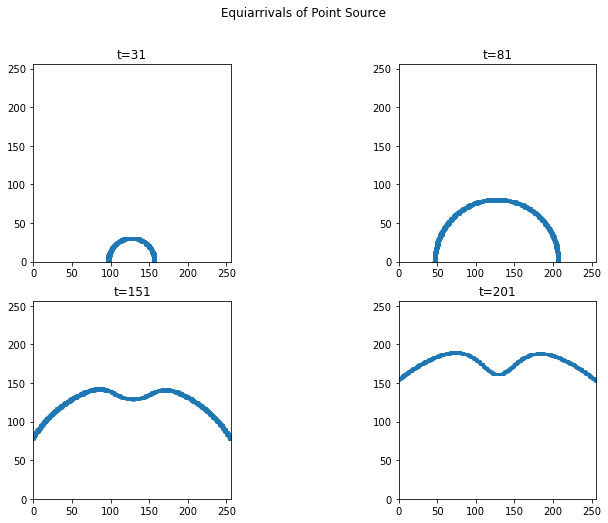

In [511]:
x1, y1, z1 = np.where((u > 30) & (u < 32))
x2, y2, z2 = np.where((u > 80) & (u < 82))
x3, y3, z3 = np.where((u > 150) & (u < 152))
x4, y4, z4 = np.where((u > 200) & (u < 201))
x5, y5, z5 = np.where((u > 220) & (u < 222))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0,0].scatter(x1, y1, s=3)
axes[0,0].set_title('t=31')
axes[0,0].axis('square')
axes[0,0].set_xlim(0, 256)
axes[0,0].set_ylim(0, 256)


axes[0,1].scatter(x2, y2, s=3)
axes[0,1].set_title('t=81')
axes[0,1].axis('square')
axes[0,1].set_xlim(0, 256)
axes[0,1].set_ylim(0, 256)


axes[1,0].scatter(x3, y3, s=3)
axes[1,0].set_title('t=151')
axes[1,0].axis('square')
axes[1,0].set_xlim(0, 256)
axes[1,0].set_ylim(0, 256)


axes[1,1].scatter(x4, y4, s=3)
axes[1,1].set_title('t=201')
axes[1,1].axis('square')
axes[1,1].set_xlim(0, 256)
axes[1,1].set_ylim(0, 256)
plt.suptitle('Equiarrivals of Point Source')
plt.show()

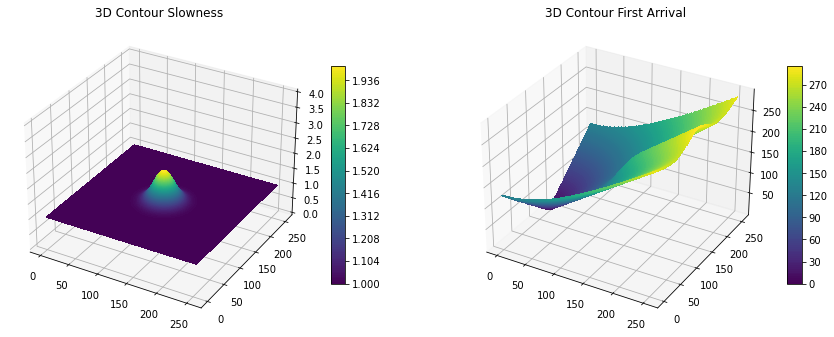

In [571]:
min_values = np.min(u, axis=2)
X, Y = np.meshgrid(np.arange(min_values.shape[0]), np.arange(min_values.shape[1]))

fig = plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(121, projection='3d')
contour1 = ax1.contourf(X, Y, slowness_field, 128, cmap='viridis')
ax1.set_title('3D Contour Slowness')
ax1.set_zlim(0, 4)
fig.colorbar(contour1, ax=ax1, shrink=0.5, aspect=15)

ax2 = fig.add_subplot(122, projection='3d')
contour2 = ax2.contourf(X, Y, min_values, 128, cmap='viridis')
ax2.set_title('3D Contour First Arrival')
fig.colorbar(contour2, ax=ax2, shrink=0.5, aspect=15)

plt.show()

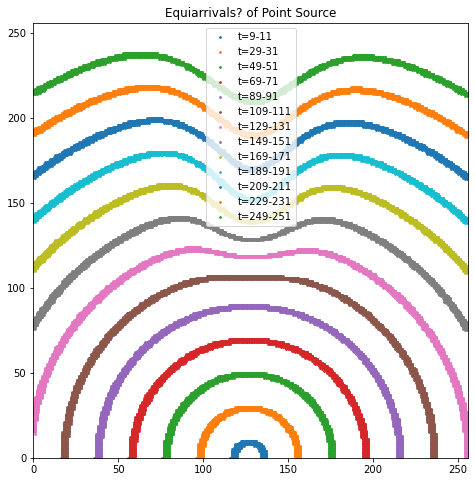

In [575]:
intervals = [(9, 11), (29, 31), (49, 51), (69, 71), (89, 91), (109, 111), (129, 131), (149, 151), (169, 171), (189, 191), (209, 211), (229, 231), (249,251)]
fig, ax = plt.subplots(figsize=(8, 8))
for low, high in intervals:
    x, y, _ = np.where((u > low) & (u < high))
    ax.scatter(x, y, s=3, label=f't={low}-{high}')

ax.set_title('Equiarrivals? of Point Source')
ax.axis('square')
ax.set_xlim(0, 256)
ax.set_ylim(0, 256)
ax.legend()
plt.show()
